# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd


## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [2]:
 pd.read_csv('animals.csv')

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
 co = pd.read_csv('animals.csv')
co.shape

(7, 3)

In [4]:
co.dtypes

animal    object
name      object
length     int64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [5]:
co.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [6]:
co.sort_values(by ='length', ascending = False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [7]:
co['length'].describe()

count     7.000000
mean     38.857143
std      17.101935
min      10.000000
25%      33.500000
50%      35.000000
75%      47.500000
max      65.000000
Name: length, dtype: float64

## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [8]:
co.animal.value_counts()

cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [9]:
co.animal == 'dog'

0    False
1    False
2     True
3     True
4    False
5     True
6    False
Name: animal, dtype: bool

In [10]:
co[co.animal == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [11]:
co.length > 40

co[co.length > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [12]:
inches = [13.78, 17.72, 25.59, 19.69, 12.60, 13.78, 3.94]
co['inches'] = inches
co

,animal,name,length,inches
0,cat,Anne,35,13.78
1,cat,Bob,45,17.72
2,dog,Egglesburg,65,25.59
3,dog,Devon,50,19.69
4,cat,Charlie,32,12.60
5,dog,Fontaine,35,13.78
6,cat,Xypher,10,3.94


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [13]:
cats = co.animal == 'cat'
co[cats].head()

,animal,name,length,inches
0,cat,Anne,35,13.78
1,cat,Bob,45,17.72
4,cat,Charlie,32,12.60
6,cat,Xypher,10,3.94


In [14]:
dogs = co.animal == 'dog'
co[dogs].head()

,animal,name,length,inches
2,dog,Egglesburg,65,25.59
3,dog,Devon,50,19.69
5,dog,Fontaine,35,13.78


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [15]:
[cats > 12]


[0    False
 1    False
 2    False
 3    False
 4    False
 5    False
 6    False
 Name: animal, dtype: bool]

## 12) What's the mean length of a cat? What's the mean length of a dog?

In [16]:
import numpy as np

In [17]:
cats.mean()

0.5714285714285714

In [18]:
dogs.mean()

0.42857142857142855

## 13) If you didn't already, use `groupby` to do #12 all at once

In [19]:
co[co.animal =='cat'].groupby(by='length').size().sort_values(ascending=False)

length
45    1
35    1
32    1
10    1
dtype: int64

In [20]:
co[co.animal =='dog'].groupby(by='length').size().sort_values(ascending=False)

length
65    1
50    1
35    1
dtype: int64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

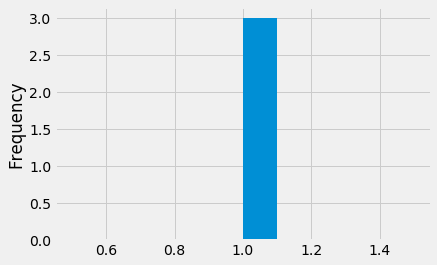

In [25]:
co[co.animal =='dog'].groupby(by='length').size().sort_values(ascending=False).plot(kind='hist')

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

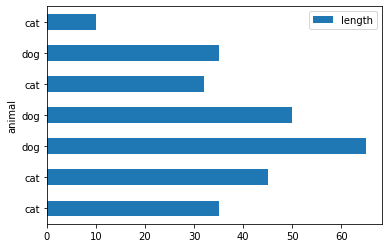

In [22]:
co.plot(x='animal', y='length', kind='barh')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

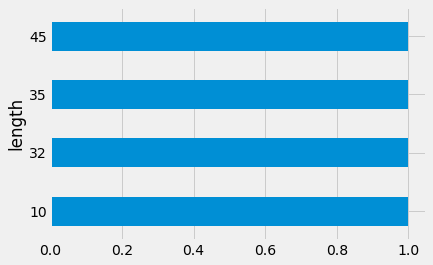

In [27]:
co[co.animal =='cat'].groupby(by='length').size().sort_values(ascending=True).plot(kind='barh')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')